In [2]:
# import these are all needed for fnc
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from scipy.optimize import curve_fit
from scipy.io import loadmat

In [ ]:
# load model

In [4]:
# what conds
prob_split = '70_30' # the probability of stimulus 1 vs all
afc = '2' # number of alternatives
coh = 'lo' # coherence
feedback = False # interlayer feedback (true or false)
model = 0

task_info = {}
task_info['trials'] = 1000
task_info['trial_dur'] = 250  # trial duration (timesteps)
task_info['stim_on'] = 80
task_info['stim_dur'] = 50

data_dir = f"/mnt/neurocube/local/serenceslab/holly/RNN_Geo/data/rdk_{prob_split}_{afc}afc/feedforward_only/{coh}_coh"

# Get all the trained models (should be 40 .mat files)
mat_files = [f for f in os.listdir(data_dir) if f.endswith('.mat')]
# Choose one model as an example
model_path = os.path.join(data_dir, mat_files[model])
# Load data
data_file = f"{data_dir}/Trials{task_info['trials']}_model{model_path[-7:-4]}_balanced.npz"
data = np.load(data_file)
#model = loadmat(model_path) # model.keys()



In [27]:
data.keys()
data_d = data['fr2']

In [10]:
np.shape(data_d) # trials, time steps, units

(1000, 250, 200)

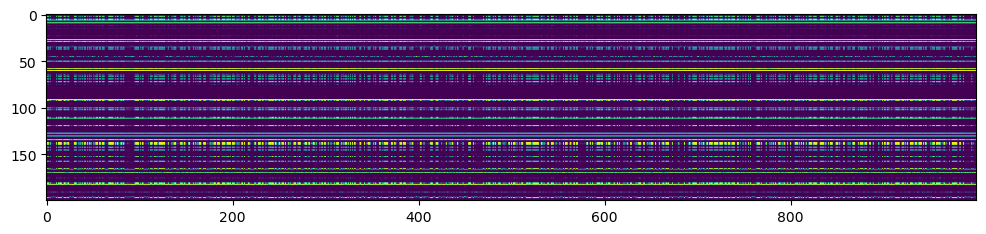

In [37]:
# plot fr over trials, select four time points
plt.figure(figsize=(12, 8))  # Adjust size as needed
plt.imshow((data_d[:,130,:]).T); # plot stim offset


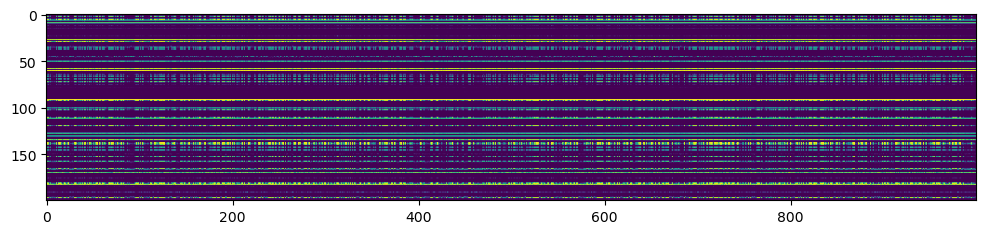

In [29]:
plt.figure(figsize=(12, 8))  # Adjust size as needed
plt.imshow((data_d[:,150,:]).T); # a little while after stim offset, but before decoding accuracy drops


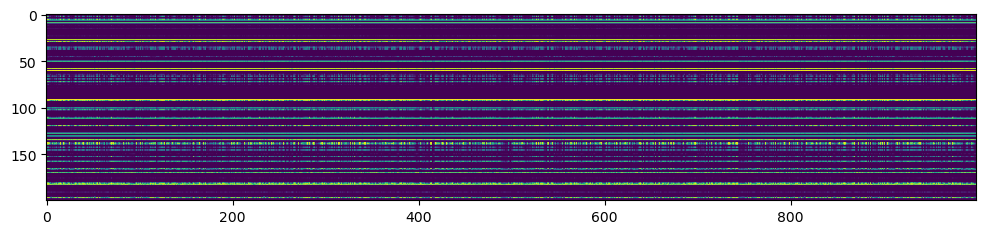

In [35]:
plt.figure(figsize=(12, 8))  # Adjust size as needed
plt.imshow((data_d[:,200,:]).T); # a while after stim offset when decoding accuracy drops


In [ ]:
# Make plots based on outputs
# plot fr over trials
# Plot decoding accuracy over time
plt.figure()
plt.plot(range(task_info['trial_dur']), )
plt.xlabel('Time Step')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy Over Time')
plt.axvspan(task_info['stim_on'], task_info['stim_on']+task_info['stim_dur'], color = 'gray', alpha = 0.3)
if save_plt:
    plt.savefig(f"{data_dir}/decode_T{task_info['trials']}_{D_params['label']}_{D_params['pred']}.png")
plt.show()  


# fit logistic function
def logistic_func(x, a, b, c, d):
    return a / (1 + np.exp(-c * (x - d))) + b

popt, _ = curve_fit(logistic_func, range(0, task_info['trial_dur']), acc[0:])

# 'popt' will contain the fitted parameters (a, b, c) of the log function

# Optional: Estimate the y-value of the asymptote (assuming based on parameter b)
asymptote_y = popt[1]
print("Estimated y-value of the asymptote:", asymptote_y)

# Optional: Visualization
plt.plot(range(0, task_info['trial_dur']), acc[0:], label='Data')
plt.plot(range(0, task_info['trial_dur']), logistic_func(range(0, task_info['trial_dur']), *popt), label=f'y asymptote of logistic {round(asymptote_y, 3)}')
plt.axvspan(task_info['stim_on'], task_info['stim_on']+task_info['stim_dur'], color = 'gray', alpha = 0.3)
plt.xlabel('Time Step')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy Over Time (Logistic Fit)')
plt.legend()
if save_plt:
    plt.savefig(f"{data_dir}/decode_T{task_info['trials']}_{D_params['label']}_{D_params['pred']}fit.png")
plt.show()